In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

# Loading Data

In [2]:
data=pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Analysis

In [8]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [10]:
data['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [11]:
geography_num=data['Geography'].value_counts()
geography_num

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
gender_num=data['Gender'].value_counts()
gender_num

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
data['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [14]:
data['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

# Visualization 

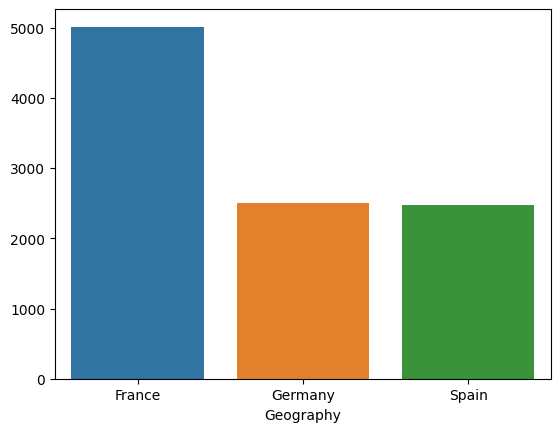

In [15]:
sns.barplot(x=geography_num.index,y=geography_num.values)
plt.show()

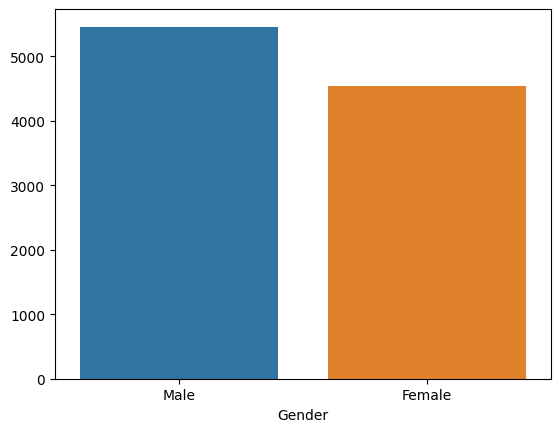

In [16]:
sns.barplot(y=gender_num.values,x=gender_num.index)
plt.show()

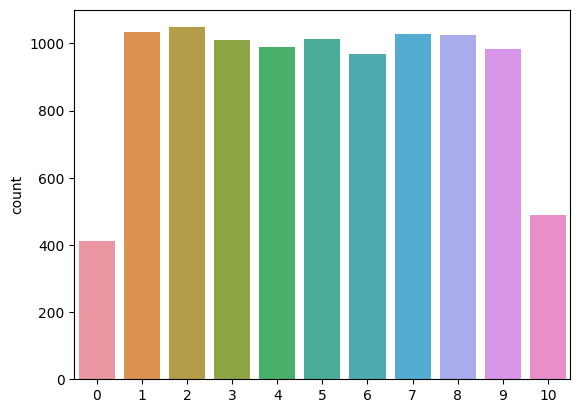

In [17]:
sns.countplot(data=data,x=data['Tenure'].values)
plt.show()

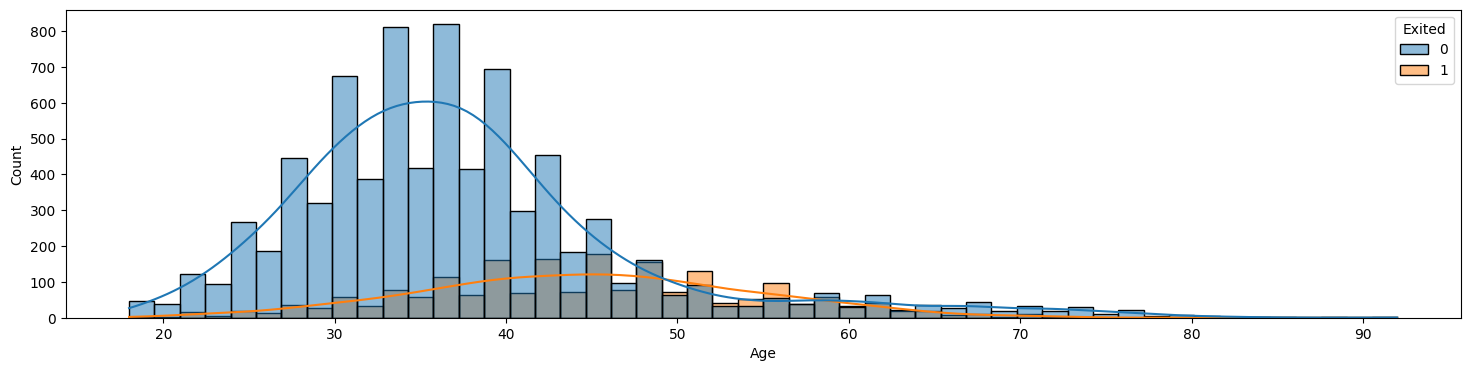

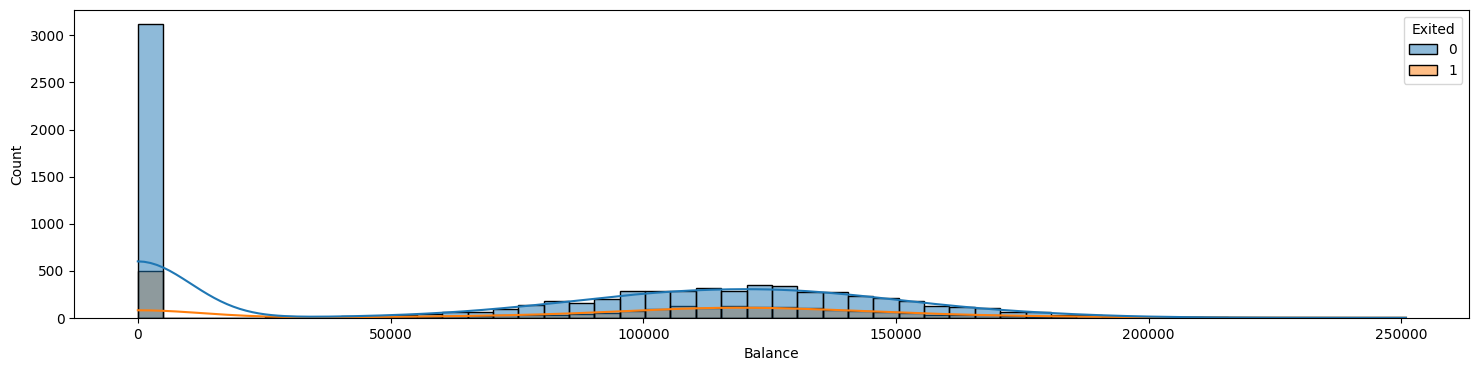

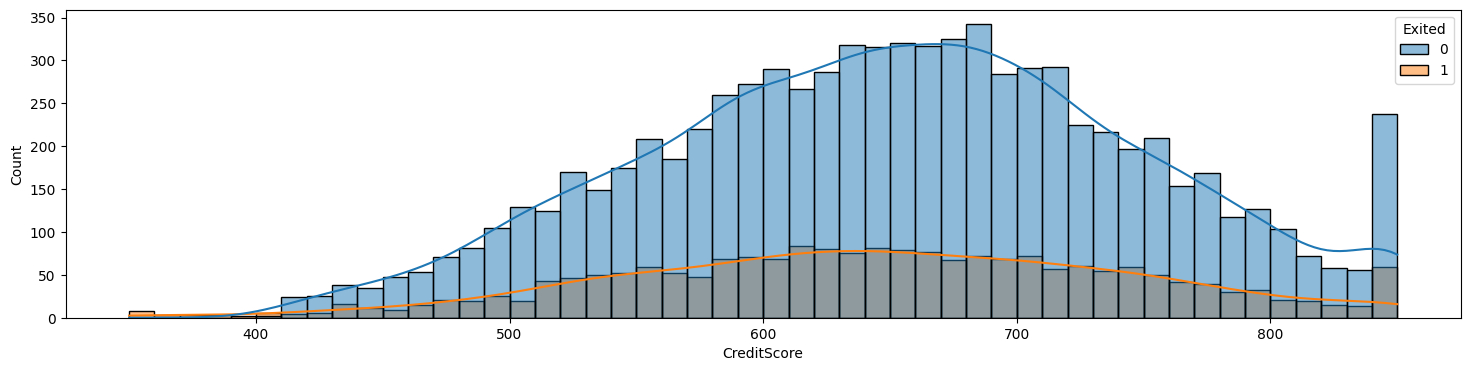

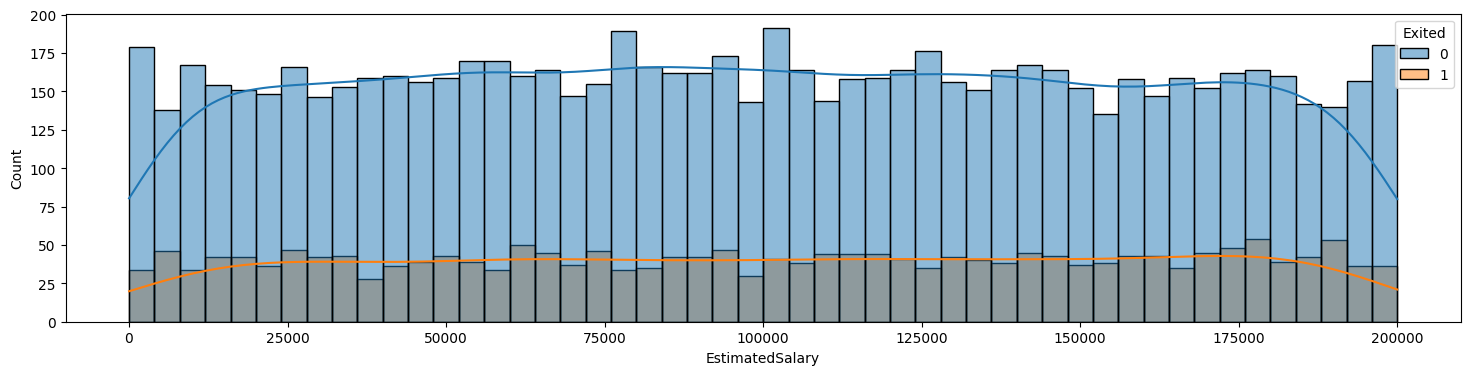

In [18]:
numerical_val=data[['Age','Balance','CreditScore','EstimatedSalary']]

for i in numerical_val:
    fig, ax = plt.subplots(figsize=(18, 4))
    fig = sns.histplot(data=data, x=i, hue="Exited", bins=50, kde=True)
    plt.show()
    

In [19]:
data_corr=data.select_dtypes('int64','float64').corr()
data_corr

,CreditScore,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,Exited
CreditScore,1.000000,-0.003965,0.000842,0.012238,-0.005458,0.025651,-0.027094
Age,-0.003965,1.000000,-0.009997,-0.030680,-0.011721,0.085472,0.285323
Tenure,0.000842,-0.009997,1.000000,0.013444,0.022583,-0.028362,-0.014001
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,0.003183,0.009612,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,0.003183,1.000000,-0.011866,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,0.009612,-0.011866,1.000000,-0.156128
Exited,-0.027094,0.285323,-0.014001,-0.047820,-0.007138,-0.156128,1.000000


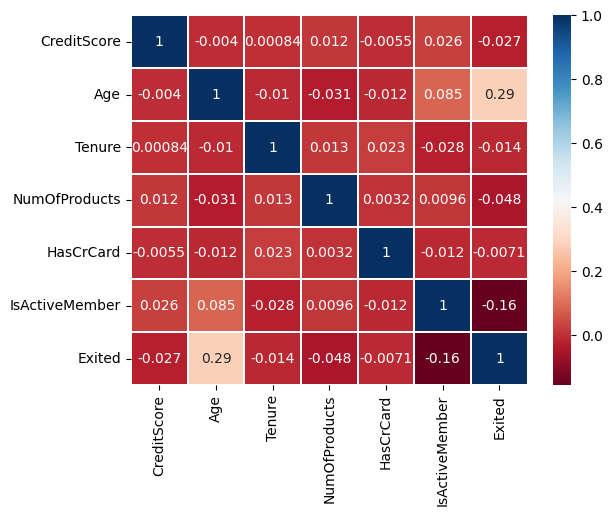

In [20]:
sns.heatmap(data_corr,annot=True,cmap='RdBu',linewidths=0.1)
plt.show()

# Data Scaling

In [21]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
data_scaled=pd.get_dummies(data,dtype='int64',drop_first=True)
data_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


# Splitting Data

In [23]:
X=data_scaled.drop('Exited',axis=1)
y=data_scaled['Exited']
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,shuffle=True,random_state=0)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

# Logistic Regression Model

In [26]:
logistic_reg=LogisticRegression(penalty='l1',solver='liblinear',C=0.1)
logistic_reg.fit(X_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [27]:
logistic_reg.score(X_train,y_train)

0.8102564102564103

In [28]:
logistic_reg.score(X_test,y_test)

0.8168181818181818

In [29]:
y_pred_reg=logistic_reg.predict(X_test)

In [30]:
print(list(y_test[:10]))
print(list(y_pred_reg[:10]))

[0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]


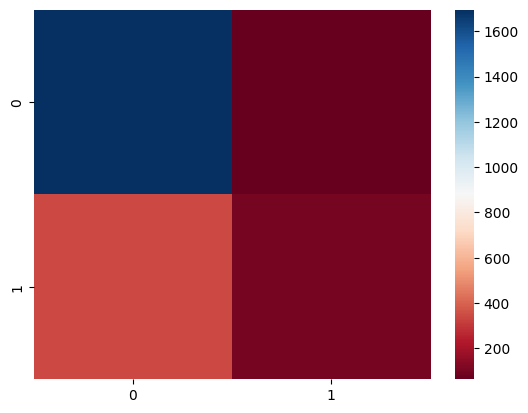

confusion_matrix:
 [[1696   63]
 [ 340  101]]
accuracy_score: 0.8168181818181818


In [31]:
acc_score=accuracy_score(y_test,y_pred_reg,normalize=True)

cm=confusion_matrix(y_test,y_pred_reg)
sns.heatmap(cm,cmap='RdBu')
plt.show()

print(f'confusion_matrix:\n {cm}')
print(f'accuracy_score: {acc_score}')

# Random Forest Model

In [32]:
forest=RandomForestClassifier(n_estimators=400,criterion='gini',max_depth=30,min_samples_split=4)
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=400)

In [33]:
forest.score(X_train,y_train)

0.9919230769230769

In [34]:
forest.score(X_test,y_test)

0.87

In [35]:
y_pred_forest=forest.predict(X_test)

In [36]:
print(list(y_test[:10]))
print(list(y_pred_forest[:10]))

[0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]


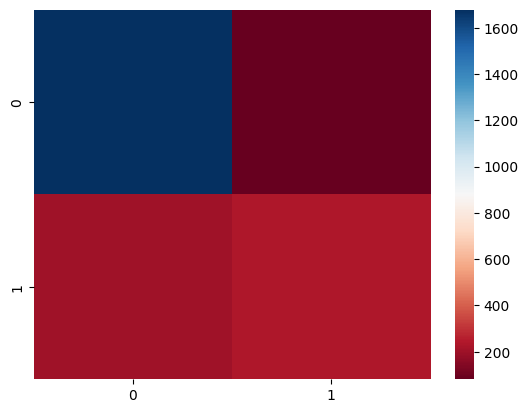

confusion_matrix:
 [[1678   81]
 [ 205  236]]
accuracy_score: 0.87


In [37]:
acc_score=accuracy_score(y_test,y_pred_forest,normalize=True)

cm=confusion_matrix(y_test,y_pred_forest)
sns.heatmap(cm,cmap='RdBu')
plt.show()

print(f'confusion_matrix:\n {cm}')
print(f'accuracy_score: {acc_score}')

# Gradient Boosting Model 

In [38]:
boost=GradientBoostingClassifier(loss='deviance',learning_rate=0.1, n_estimators=300,max_depth=10,min_samples_split=4)
boost.fit(X_train,y_train)

GradientBoostingClassifier(loss='deviance', max_depth=10, min_samples_split=4,
                           n_estimators=300)

In [39]:
boost.score(X_train,y_train)

1.0

In [40]:
boost.score(X_test,y_test)

0.8631818181818182

In [41]:
y_pred_boost=boost.predict(X_test)

In [42]:
print(list(y_test[:10]))
print(list(y_pred_boost[:10]))

[0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]


In [43]:
boost.feature_importances_

array([0.12713928, 0.23290503, 0.0462516 , 0.17647957, 0.1312781 ,
       0.00786292, 0.05467999, 0.16798103, 0.02617987, 0.01075319,
       0.01848941])

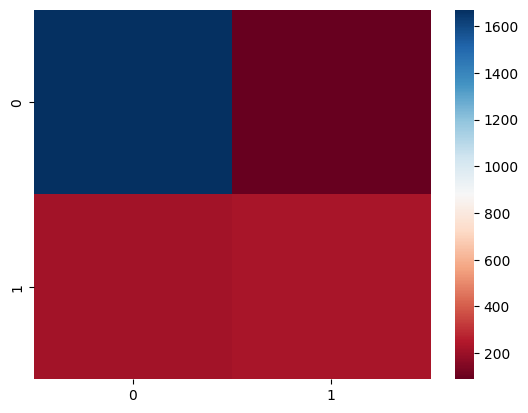

confusion_matrix:
 [[1671   88]
 [ 213  228]]
accuracy_score: 0.8631818181818182


In [44]:
acc_score=accuracy_score(y_test,y_pred_boost,normalize=True)

cm=confusion_matrix(y_test,y_pred_boost)
sns.heatmap(cm,cmap='RdBu')
plt.show()

print(f'confusion_matrix:\n {cm}')
print(f'accuracy_score: {acc_score}')